In [1]:
import os
import pandas as pd

%load_ext autoreload
%autoreload 1

%aimport myvisual
import myvisual as vs

# Pretty display for notebooks
%matplotlib inline

In [2]:
SESSION_DIR = '/Users/tnguyen/src/bert/JUL17_B/'
OUTPUT_DIR = os.path.join(SESSION_DIR, 'outputs_drop04_lr03e-5_steps10_ls01')

# Training data set

In [3]:
train_df = pd.read_csv(os.path.join(SESSION_DIR, 'train.csv'))
dev_df = pd.read_csv(os.path.join(SESSION_DIR, 'dev.csv'))
train_df = pd.concat([train_df, dev_df])

In [4]:
train_df.head()

,job_id,job_text,level1_id
0,5aff17d812f61b67f06afc3a,sr information architect ¥ summary role evalua...,18
1,5898ea11bcaee36edce75244,iam controls compliance analyst ¥ position sum...,20
2,57fffbfad20baf05d08aa807,maintenance manager ¥ maintenance manager come...,15
3,5bc7645b12f61b65c930c786,supervisor utilization management rn preferred...,16
4,5a8afab012f61b09d6217d68,oconus support engineer ¥ opportunity support ...,19


In [75]:
label12_df = train_df[train_df['level1_id']==12]
label12_df['job_text'].iloc[0]

'master arts counseling program director ¥ job summary master arts counseling mac program director oversees aspects mac degree program including curriculum clinical practicum internships faculty training development student assessment council accreditation counseling related educational programs cacrep accreditation program director contact point student staff faculty issues prior escalation dean mac program director maintains core faculty status faculty rank assigned according colorado christian university faculty handbook duties responsibilities serves liaison cacrep primary point person communications university cacrep responsible daytoday operations mac program supervision dean social science humanities supervise support clinical coordinator maintain curriculum development oversight courses mac program oversee inseat online delivery mac program interview new fulltime affiliate faculty assigned dean oversee student learning assessment developing modifying needed executing mac assess

## Number of jobs per class

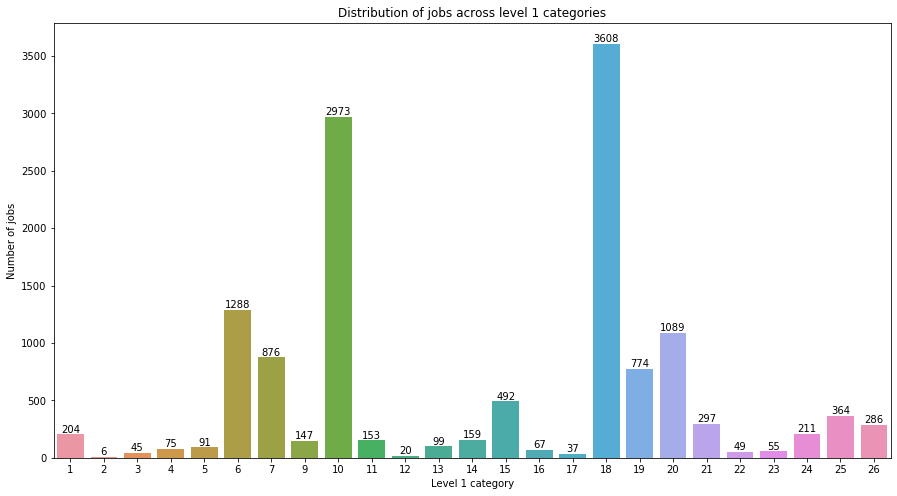

In [112]:
vs.plot_job_count(train_df, figsize=(15,8))

# Prediction

In [85]:
CKPT_STEP = 8800

In [87]:
train_predict = pd.read_csv(os.path.join(OUTPUT_DIR, f'train_predict_{CKPT_STEP}.csv'))
dev_predict = pd.read_csv(os.path.join(OUTPUT_DIR, f'dev_predict_{CKPT_STEP}.csv'))
test_predict = pd.read_csv(os.path.join(OUTPUT_DIR, f'test_predict_{CKPT_STEP}.csv'))

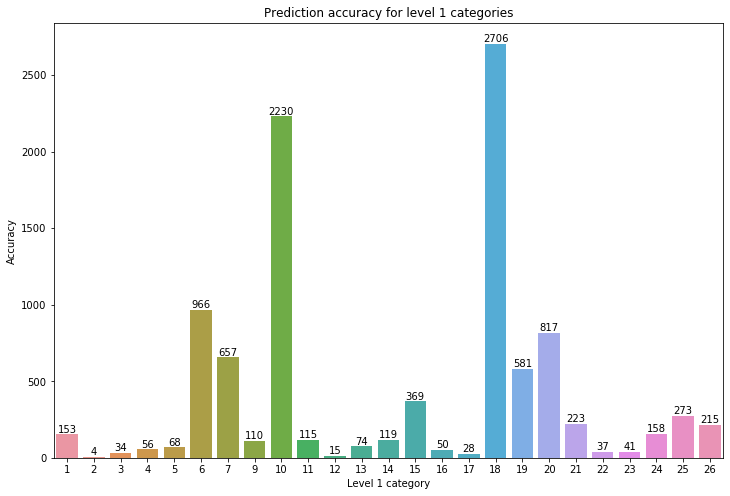

In [118]:
vs.plot_accuracy(train_predict, figsize=(12,8))

In [88]:
train_predict['correct'] = train_predict['predicted_label'] == train_predict['label']
dev_predict['correct'] = dev_predict['predicted_label'] == dev_predict['label']
test_predict['correct'] = test_predict['predicted_label'] == test_predict['label']

In [89]:
def class_accuracy(predict_df):
    predict_df['correct'] = predict_df['predicted_label'] == predict_df['label']
    class_count = predict_df.groupby('label').job_id.count()
    correct_count = predict_df.groupby('label').correct.sum()
    class_acc = 100 * correct_count / class_count
    class_acc.sort_values(ascending=False, inplace=True)
    return class_acc

In [90]:
train_predict.head()

,job_id,predicted_label,label,correct
0,5aff17d812f61b67f06afc3a,18,18,True
1,5898ea11bcaee36edce75244,18,20,False
2,57fffbfad20baf05d08aa807,15,15,True
3,5bc7645b12f61b65c930c786,16,16,True
4,5a8afab012f61b09d6217d68,19,19,True


In [91]:
len(train_predict[train_predict['label']==12])

15

## Percentage of correct prediction on training set

In [60]:
df = train_predict.groupby('label').correct.describe()
df['acc'] = 100 * df['freq']/df['count']
print(df)

      count unique    top  freq      acc
label                                   
1       153      2   True   133  86.9281
2         4      2   True     2       50
3        34      2   True    30  88.2353
4        56      2   True    45  80.3571
5        68      2   True    54  79.4118
6       966      2   True   915  94.7205
7       657      2   True   627  95.4338
9       110      2   True   100  90.9091
10     2230      2   True  2148  96.3229
11      115      2   True    86  74.7826
12       15      1  False    15      100
13       74      2   True    51  68.9189
14      119      2   True   105  88.2353
15      369      2   True   353   95.664
16       50      2   True    32       64
17       28      2  False    22  78.5714
18     2706      2   True  2632  97.2653
19      581      2   True   509  87.6076
20      817      2   True   736  90.0857
21      223      2   True   194  86.9955
22       37      2   True    24  64.8649
23       41      2   True    29  70.7317
24      158     

In [80]:
print(class_accuracy(train_predict))

label
18    97.265336
10    96.322870
15    95.663957
7     95.433790
6     94.720497
26    93.488372
9     90.909091
20    90.085679
3     88.235294
14    88.235294
19    87.607573
25    87.545788
21    86.995516
1     86.928105
4     80.357143
5     79.411765
11    74.782609
24    72.784810
23    70.731707
13    68.918919
22    64.864865
16    64.000000
2     50.000000
17    21.428571
12     0.000000
dtype: float64


In [81]:
print(class_accuracy(dev_predict))

label
10    91.117093
18    90.243902
15    87.804878
7     87.671233
26    84.507042
6     84.161491
14    82.500000
9     75.675676
5     73.913043
3     72.727273
1     68.627451
25    67.032967
21    66.216216
24    66.037736
20    64.705882
11    60.526316
19    56.994819
13    48.000000
4     42.105263
16    41.176471
22    33.333333
23    28.571429
12     0.000000
17     0.000000
2      0.000000
dtype: float64


In [82]:
print(class_accuracy(test_predict))

label
10    91.129032
18    90.586932
15    86.991870
7     86.818182
6     85.758514
26    80.555556
14    79.487179
5     77.272727
25    70.652174
4     66.666667
20    64.835165
13    62.500000
9     62.162162
1     60.784314
11    60.526316
22    58.333333
21    57.333333
19    57.216495
3     54.545455
24    51.923077
16    50.000000
23    38.461538
17    22.222222
12     0.000000
2      0.000000
dtype: float64


## Wrong predictions

## Label 12